# 💡 Understanding Polynomial Regression: Overfitting vs Underfitting

Polynomial regression helps us simulate how model complexity affects learning.

We generate a synthetic dataset based on a sine function:

$$ y = \sin(x) + \text{noise} $$

We then fit models of increasing complexity (degree 1, 4, 15) and visualize their predictions.

## 🔸 Degree Interpretations

- **Degree 1**: Straight line — too simple → underfitting
- **Degree 4**: Good fit — captures sine trend smoothly
- **Degree 15**: Very complex — fits noise → overfitting


## 📈 Visual Output Summary

| Degree | Train Error | Test Error | Behavior         |
|--------|-------------|------------|------------------|
| 1      | High        | High       | Underfitting     |
| 4      | Low         | Low        | Good Fit         |
| 15     | Very Low    | High       | Overfitting      |

## ⚖️ Bias-Variance Tradeoff

| Term           | Description                                  |
|----------------|----------------------------------------------|
| Bias           | Error from too simple assumptions (underfit) |
| Variance       | Error from being too sensitive (overfit)     |
| Overfitting    | Low bias, high variance                      |
| Underfitting   | High bias, low variance                      |


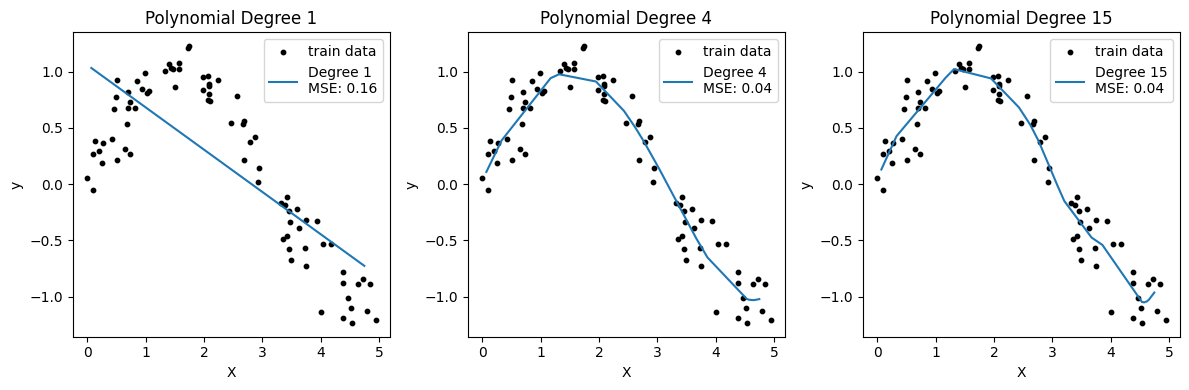

In [1]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(1)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.2, X.shape[0])

# Test data
X_test = np.sort(5 * np.random.rand(20, 1), axis=0)
y_test = np.sin(X_test).ravel() + np.random.normal(0, 0.2, X_test.shape[0])

# Plot performance for degree = 1, 4, 15
plt.figure(figsize=(12, 4))

for i, degree in enumerate([1, 4, 15]):
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)
    model = LinearRegression()
    model.fit(X_poly, y)
    y_pred = model.predict(poly.transform(X_test))

    mse = mean_squared_error(y_test, y_pred)

    plt.subplot(1, 3, i + 1)
    plt.scatter(X, y, color='black', s=10, label="train data")
    plt.plot(X_test, y_pred, label=f"Degree {degree}\nMSE: {mse:.2f}")
    plt.legend()
    plt.title(f"Polynomial Degree {degree}")
    plt.xlabel("X")
    plt.ylabel("y")

plt.tight_layout()
plt.show()
